In [1]:
import pandas as pd 

In [241]:
df = pd.read_csv('Baltimore911.csv')
print(df.columns)
print(df.shape)

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'vri_name1',
       'Total Incidents'],
      dtype='object')
(292761, 16)


/var/folders/d4/8rhnvj0117zdskwp5zb5ywg40000gn/T/ipykernel_53207/326077351.py:1: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



In [237]:
import pandas as pd
from prettytable import PrettyTable

# Load the dataset
df = pd.read_csv('Baltimore911.csv')

# Data Type Summary
numeric_columns = df.select_dtypes(include=['number']).columns
discrete_columns = df.select_dtypes(include=['object']).columns
temporal_columns = []  # Add temporal columns if any
spatial_columns = []   # Add spatial columns if any

data_type_table = PrettyTable()
data_type_table.field_names = ["Data Type", "Columns"]
data_type_table.add_row(["Numeric/Real/Continuous", ", ".join(list(numeric_columns))])
data_type_table.add_row(["Symbolic/Discrete", ", ".join(list(discrete_columns))])
data_type_table.add_row(["Temporal", ", ".join(temporal_columns)])
data_type_table.add_row(["Spatial", ", ".join(spatial_columns)])

print("Data Type Summary:")
print(data_type_table)

# Numeric Attributes Summary
numeric_stats = df.describe()

numeric_stats_table = PrettyTable()
numeric_stats_table.field_names = ["Statistic"] + list(numeric_stats.columns)
for row in numeric_stats.itertuples():
    numeric_stats_table.add_row(row)

print("\nNumeric Attributes Summary:")
print(numeric_stats_table)

# Discrete Attributes Summary
discrete_attributes = df.select_dtypes(include=['object'])
unique_counts = discrete_attributes.nunique()
top3_values = discrete_attributes.stack().value_counts()[:3]

discrete_stats_table = PrettyTable()
discrete_stats_table.field_names = ["Summary", "Value"]
discrete_stats_table.add_row(["Total Number of Unique Values", unique_counts.sum()])
discrete_stats_table.add_row(["Three Attribute Values with the Largest Count", ", ".join(top3_values.index)])

print("\nDiscrete Attributes Summary:")
print(discrete_stats_table)

# Level of Missingness
missingness = (df.isnull().sum() / len(df)) * 100

missingness_table = PrettyTable()
missingness_table.field_names = ["Column", "Missingness (%)"]
for column, percent in missingness.items():
    missingness_table.add_row([column, f"{percent:.2f}%"])

print("\nLevel of Missingness:")
print(missingness_table)


/var/folders/d4/8rhnvj0117zdskwp5zb5ywg40000gn/T/ipykernel_53207/3440077771.py:5: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



Data Type Summary:
+-------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|        Data Type        |                                                             Columns                                                              |
+-------------------------+----------------------------------------------------------------------------------------------------------------------------------+
| Numeric/Real/Continuous |                                         Longitude, Latitude, Location 1, Total Incidents                                         |
|    Symbolic/Discrete    | CrimeDate, CrimeTime, CrimeCode, Location, Description, Inside/Outside, Weapon, Post, District, Neighborhood, Premise, vri_name1 |
|         Temporal        |                                                                                                                                  |
|         Spatial         |

In [231]:
# Assuming 'df' is your DataFrame
# Use the .isnull() function to check for null values, and then .sum() to count them for each column

from prettytable import PrettyTable

# Calculate null counts
null_counts = df.isnull().sum()

# Create a pretty table
table = PrettyTable()
table.field_names = ["Column Name", "Null Count"]

# Add data to the table
for column, count in null_counts.items():
    table.add_row([column, count])

# Print the table
print(table)


+-----------------+------------+
|   Column Name   | Null Count |
+-----------------+------------+
|    CrimeDate    |     0      |
|    CrimeTime    |     0      |
|    CrimeCode    |     0      |
|     Location    |    1072    |
|   Description   |     0      |
|  Inside/Outside |     0      |
|      Weapon     |     0      |
|       Post      |    1413    |
|     District    |     0      |
|   Neighborhood  |    4768    |
|    Longitude    |    1155    |
|     Latitude    |    1155    |
|     Premise     |     0      |
| Total Incidents |     0      |
|     datetime    |     0      |
|       Year      |     0      |
|      Month      |     0      |
|    DayOfWeek    |     0      |
+-----------------+------------+


In [5]:
# Assuming 'df' is your DataFrame

# Drop rows with null values in the 'CrimeTime' column
df = df.dropna(subset=['CrimeTime'])

# Reset the index after dropping rows
df = df.reset_index(drop=True)


In [6]:
print(df.columns)

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'vri_name1',
       'Total Incidents'],
      dtype='object')


In [7]:
# Assuming 'df' is your DataFrame

# Drop rows with null values in both 'Inside/Outside' and 'Premise' columns
df = df.dropna(subset=['Inside/Outside', 'Premise'])

# Reset the index after dropping rows
df = df.reset_index(drop=True)


In [8]:
print(f"the number of rows after dropping missing values: {df.shape[0]}")

the number of rows after dropping missing values: 258723


In [9]:
df['Weapon'].fillna('Unknown', inplace=True)

In [232]:
from prettytable import PrettyTable

# Calculate null counts
null_counts = df.isnull().sum()

# Create a pretty table
table = PrettyTable()
table.field_names = ["Column Name", "Null Count"]

# Add data to the table
for column, count in null_counts.items():
    table.add_row([column, count])

# Print the table
print("Null Value Counts:")
print(table)


Null Value Counts:
+-----------------+------------+
|   Column Name   | Null Count |
+-----------------+------------+
|    CrimeDate    |     0      |
|    CrimeTime    |     0      |
|    CrimeCode    |     0      |
|     Location    |    1072    |
|   Description   |     0      |
|  Inside/Outside |     0      |
|      Weapon     |     0      |
|       Post      |    1413    |
|     District    |     0      |
|   Neighborhood  |    4768    |
|    Longitude    |    1155    |
|     Latitude    |    1155    |
|     Premise     |     0      |
| Total Incidents |     0      |
|     datetime    |     0      |
|       Year      |     0      |
|      Month      |     0      |
|    DayOfWeek    |     0      |
+-----------------+------------+


In [12]:
print(df.shape[0])

258723


In [13]:
# Drop the 'Location 1' attribute
df = df.drop('Location 1', axis=1)

In [14]:
print(df.columns)

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Premise', 'vri_name1', 'Total Incidents'],
      dtype='object')


In [18]:
print(len(df.columns))

15


In [19]:
# Replace 'I/O' with 'Inside/Outside' in the 'Inside/Outside' column
df['Inside/Outside'].replace('I/O', 'Inside/Outside', inplace=True)

In [21]:
# Drop the 'Vri_name1' attribute
df = df.drop('vri_name1', axis=1)

In [23]:
# Assuming 'df' is your DataFrame

# Step 1: Identify rows with missing 'Post'
missing_post_rows = df[df['Post'].isnull()]

# Step 2 and 3: Iterate through each missing 'Post' row and check for matching rows
for index, row in missing_post_rows.iterrows():
    matching_rows = df[(df['Longitude'] == row['Longitude']) & 
                       (df['Latitude'] == row['Latitude']) & 
                       (df['District'] == row['District']) &
                       (df['Post'].notnull())]
    if not matching_rows.empty:
        matching_row = matching_rows.iloc[0]
        df.at[index, 'Post'] = matching_row['Post']

# Now 'Post' values have been filled for rows with matching 'Longitude', 'Latitude', and 'District'


In [24]:
# Assuming 'df' is your DataFrame

# Step 1: Identify rows with missing 'Neighborhood'
missing_neighborhood_rows = df[df['Neighborhood'].isnull()]

# Step 2 and 3: Iterate through each missing 'Neighborhood' row and check for matching rows
for index, row in missing_neighborhood_rows.iterrows():
    matching_rows = df[(df['Longitude'] == row['Longitude']) & 
                       (df['Latitude'] == row['Latitude']) & 
                       (df['District'] == row['District']) &
                       (df['Neighborhood'].notnull())]
    if not matching_rows.empty:
        matching_row = matching_rows.iloc[0]
        df.at[index, 'Neighborhood'] = matching_row['Neighborhood']

# Now 'Neighborhood' values have been filled for rows with matching 'Longitude', 'Latitude', and 'District'


In [25]:
# Remove duplicate rows, keeping the first occurrence
df = df.drop_duplicates(keep='first')

# Reset the index after removing duplicates
df = df.reset_index(drop=True)

In [28]:
print(df.shape)

(248798, 14)


In [233]:
from prettytable import PrettyTable

# 1. Identify the data type of each column
column_data_types = df.dtypes

# Create a pretty table for data types
data_types_table = PrettyTable()
data_types_table.field_names = ["Column Name", "Data Type"]

# Add data to the table
for column, data_type in column_data_types.items():
    data_types_table.add_row([column, data_type])

# 2. For numeric attributes, calculate statistics
numeric_attributes = df.select_dtypes(include=['number'])
numeric_stats = numeric_attributes.describe()

# 3. For discrete attributes, find unique values and top 3 frequencies
discrete_attributes = df.select_dtypes(include=['object'])
discrete_stats = discrete_attributes.describe()

# 4. Calculate the level of missingness
missingness = (df.isnull().sum() / len(df)) * 100

# Create a pretty table for missingness
missingness_table = PrettyTable()
missingness_table.field_names = ["Column Name", "Missingness (%)"]

# Add data to the table
for column, percent_missing in missingness.items():
    missingness_table.add_row([column, percent_missing])

# Print the results
print("Column Data Types:")
print(data_types_table)

print("\nNumeric Attributes Statistics:")
print(numeric_stats)

print("\nDiscrete Attributes Statistics:")
print(discrete_stats)

print("\nLevel of Missingness:")
print(missingness_table)


Column Data Types:
+-----------------+----------------+
|   Column Name   |   Data Type    |
+-----------------+----------------+
|    CrimeDate    | datetime64[ns] |
|    CrimeTime    |     object     |
|    CrimeCode    |     object     |
|     Location    |     object     |
|   Description   |     object     |
|  Inside/Outside |     object     |
|      Weapon     |     object     |
|       Post      |     object     |
|     District    |     object     |
|   Neighborhood  |     object     |
|    Longitude    |    float64     |
|     Latitude    |    float64     |
|     Premise     |     object     |
| Total Incidents |     int64      |
|     datetime    |     object     |
|       Year      |     int64      |
|      Month      |     int64      |
|    DayOfWeek    |     int64      |
+-----------------+----------------+

Numeric Attributes Statistics:
           Longitude       Latitude  Total Incidents           Year  \
count  247643.000000  247643.000000         248798.0  248798.000

In [30]:
# Get the three attribute values with the largest count
top3_values = discrete_attributes.stack().value_counts()[:3]


In [34]:
print("Top 3 values")
# Get the three attribute values with the largest count
top3_values = discrete_attributes.stack().value_counts()[:3]
print(top3_values)

Top 3 values
Unknown    199090
O          123722
I          120226
dtype: int64


In [12]:
# Assuming 'df' is your DataFrame

# Step 1: Data Type Summary
numeric_columns = df.select_dtypes(include=['number']).columns
discrete_columns = df.select_dtypes(include=['object']).columns
temporal_columns = []  # Add temporal columns if any
spatial_columns = []   # Add spatial columns if any

print("Data Type Summary:")
print(f"Numeric/Real/Continuous: {list(numeric_columns)}")
print(f"Symbolic/Discrete: {list(discrete_columns)}")
print(f"Temporal: {temporal_columns}")
print(f"Spatial: {spatial_columns}")

# Step 2: Numeric Attributes Summary
numeric_stats = df.describe()

print("\nNumeric Attributes Summary:")
print(numeric_stats)

# Step 3: Discrete Attributes Summary
discrete_attributes = df.select_dtypes(include=['object'])
unique_counts = discrete_attributes.nunique()
top3_values = discrete_attributes.stack().value_counts()[:3]

print("\nDiscrete Attributes Summary:")
print("Total Number of Unique Values:")
print(unique_counts)
print("\nThree Attribute Values with the Largest Count:")
print(top3_values)

# Step 4: Missingness Summary
missingness = (df.isnull().sum() / len(df)) * 100

print("\nLevel of Missingness:")
print(missingness)



Data Type Summary:
Numeric/Real/Continuous: ['Longitude', 'Latitude', 'Total Incidents', 'Year', 'Month', 'DayOfWeek']
Symbolic/Discrete: ['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description', 'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood', 'Premise', 'datetime']
Temporal: []
Spatial: []

Numeric Attributes Summary:
           Longitude       Latitude  Total Incidents           Year  \
count  247643.000000  247643.000000         248798.0  248798.000000   
mean      -76.617619      39.307053              1.0    2016.415297   
std         0.042968       0.029507              0.0       1.734536   
min       -78.757026      38.704448              1.0    1963.000000   
25%       -76.649660      39.288399              1.0    2015.000000   
50%       -76.614062      39.303314              1.0    2016.000000   
75%       -76.587089      39.327271              1.0    2018.000000   
max       -76.383228      39.661332              1.0    2020.000000   

              

In [36]:
# Assuming 'df' is your DataFrame

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Identify discrete columns (symbolic)
discrete_columns = df.select_dtypes(include=['object']).columns

# Identify temporal columns (if any)
temporal_columns = []  # Add temporal columns if any

# Identify spatial columns (if any)
spatial_columns = []   # Add spatial columns if any

# Print the results
print(f"Numeric/Real/Continuous: {list(numeric_columns)}")
print(f"Symbolic/Discrete: {list(discrete_columns)}")
print(f"Temporal: {temporal_columns}")
print(f"Spatial: {spatial_columns}")


Numeric/Real/Continuous: ['Longitude', 'Latitude', 'Total Incidents']
Symbolic/Discrete: ['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description', 'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood', 'Premise']
Temporal: []
Spatial: []


In [37]:
# Assuming 'df' is your DataFrame

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Identify discrete columns (symbolic)
discrete_columns = df.select_dtypes(include=['object']).columns

# Identify temporal columns (if any)
temporal_columns = []  # Add temporal columns if any

# Identify spatial columns (if any)
spatial_columns = []   # Add spatial columns if any

# Print the results
print(f"Numeric/Real/Continuous: {list(numeric_columns)}")
print(f"Symbolic/Discrete: {list(discrete_columns)}")
print(f"Temporal: {temporal_columns}")
print(f"Spatial: {spatial_columns}")



Numeric/Real/Continuous: ['Longitude', 'Latitude', 'Total Incidents']
Symbolic/Discrete: ['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description', 'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood', 'Premise']
Temporal: []
Spatial: []


In [236]:
from prettytable import PrettyTable

# Extracting min, max, std, and count
desired_stats = numeric_stats.loc[['min', 'max', 'mean', '50%', 'std', 'count']]

# Rename index for better presentation
desired_stats = desired_stats.rename(index={'50%': 'median'})

# Define a pretty table
desired_stats_table = PrettyTable()
desired_stats_table.field_names = ["Statistic", "Value"]

# Populate the table with statistics
for stat, value in desired_stats.items():
    desired_stats_table.add_row([stat, value])

# Print the desired statistics for numeric attributes
print("\nDesired Numeric Attributes Statistics:")
print(desired_stats_table)



Desired Numeric Attributes Statistics:
+-----------------+---------------------------------------+
|    Statistic    |                 Value                 |
+-----------------+---------------------------------------+
|    Longitude    |        min          -78.757026        |
|                 |        max          -76.383228        |
|                 |        mean         -76.617619        |
|                 |        median       -76.614062        |
|                 |        std            0.042968        |
|                 |        count     247643.000000        |
|                 |    Name: Longitude, dtype: float64    |
|     Latitude    |        min           38.704448        |
|                 |        max           39.661332        |
|                 |        mean          39.307053        |
|                 |        median        39.303314        |
|                 |        std            0.029507        |
|                 |        count     247643.000000        |


In [54]:
discrete_attributes = df.select_dtypes(include=['object'])
unique_counts = discrete_attributes.nunique()
top3_values = discrete_attributes.stack().value_counts()[:3]

# Print the total number of unique values and top 3 values for discrete attributes
print("\nDiscrete Attributes Statistics:")
print("Total Number of Unique Values:")
print(unique_counts)
print("\nThree Attribute Values with the Largest Count:")
print(top3_values)



Discrete Attributes Statistics:
Total Number of Unique Values:
CrimeDate          2288
CrimeTime          1472
CrimeCode            80
Location          25358
Description          14
Inside/Outside        2
Weapon                6
Post                256
District             10
Neighborhood        277
Premise             125
dtype: int64

Three Attribute Values with the Largest Count:
Unknown    199090
Outside    128026
Inside     120772
dtype: int64


In [55]:
missingness = (df.isnull().sum() / len(df)) * 100

# Print the level of missingness for each column
print("\nLevel of Missingness:")
print(missingness)




Level of Missingness:
CrimeDate          0.000000
CrimeTime          0.000000
CrimeCode          0.000000
Location           0.430872
Description        0.000000
Inside/Outside     0.000000
Weapon             0.000000
Post               0.567931
District           0.000000
Neighborhood       1.916414
Longitude          0.464232
Latitude           0.464232
Premise            0.000000
Total Incidents    0.000000
dtype: float64


In [50]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column

df['Inside/Outside'] = df['Inside/Outside'].str.replace('I/O', 'Inside/Outside')

# Replace 'column_name' with the actual name of the column you want to modify


In [53]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column

unique_values = df['Inside/Outside'].unique()

# Replace 'column_name' with the actual name of the column you're interested in

print(unique_values)



['Inside' 'Outside']


In [56]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column

df['Inside/Outside'] = df['Inside/Outside'].replace({'I': 'Inside', 'O': 'Outside'})

# Replace 'column_name' with the actual name of the column you're modifying


In [58]:
# Assuming df is your DataFrame
df['datetime'] = pd.to_datetime(df['CrimeDate'] + ' ' + df['CrimeTime'])

# Extract year, month, and day of the week
df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month
df['DayOfWeek'] = df['datetime'].dt.dayofweek
print(df['datetime'])
print(df['Year'])

0        2020-02-08 02:18:00
1        2020-02-08 06:00:00
2        2020-02-08 09:50:00
3        2020-02-08 17:30:00
4        2020-02-08 19:00:00
                 ...        
248793   1980-07-01 00:01:00
248794   1978-01-01 10:30:00
248795   1977-05-01 00:01:00
248796   1975-06-01 00:00:00
248797   1963-10-30 00:00:00
Name: datetime, Length: 248798, dtype: datetime64[ns]
0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
248793    1980
248794    1978
248795    1977
248796    1975
248797    1963
Name: Year, Length: 248798, dtype: int64


In [9]:
import pandas as pd
df = pd.read_csv('Baltimore911.csv')
print(df.columns)

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'vri_name1',
       'Total Incidents'],
      dtype='object')


/var/folders/d4/8rhnvj0117zdskwp5zb5ywg40000gn/T/ipykernel_17820/1853332094.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


In [60]:
df['datetime'] = pd.to_datetime(df['CrimeDate'] + ' ' + df['CrimeTime'])
df.to_csv('updated_Baltimore911.csv', index=False)


/var/folders/d4/8rhnvj0117zdskwp5zb5ywg40000gn/T/ipykernel_53207/4232679799.py:7: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/d4/8rhnvj0117zdskwp5zb5ywg40000gn/T/ipykernel_53207/4232679799.py:29: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/var/folders/d4/8rhnvj0117zdskwp5zb5ywg40000gn/T/ipykernel_53207/4232679799.py:34: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/var/folders/d4/8rhnvj0117zdskwp5zb5ywg40000gn/T/ipykernel_53207/4232679799.py:39: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Yearly Crime Incidence
+------+-----------+
| Year | Incidents |
+------+-----------+
| 1963 |     1     |
| 1975 |     1     |
| 1977 |     1     |
| 1978 |     1     |
| 1980 |     1     |
| 1981 |     1     |
| 1982 |     1     |
| 1988 |     1     |
| 1993 |     2     |
| 1998 |     1     |
| 1999 |     2     |
| 2000 |     1     |
| 2001 |     3     |
| 2004 |     1     |
| 2007 |     5     |
| 2008 |     5     |
| 2009 |     5     |
| 2010 |     3     |
| 2011 |     7     |
| 2012 |     9     |
| 2013 |     13    |
| 2014 |   42640   |
| 2015 |   44878   |
| 2016 |   45039   |
| 2017 |   39760   |
| 2018 |   37826   |
| 2019 |   35566   |
| 2020 |    3024   |
+------+-----------+

Monthly Crime Incidence
+-------+-----------+
| Month | Incidents |
+-------+-----------+
|   1   |   20339   |
|   2   |   16336   |
|   3   |   18129   |
|   4   |   19871   |
|   5   |   21931   |
|   6   |   21905   |
|   7   |   22088   |
|   8   |   22343   |
|   9   |   21945   |
|   10  |   2286

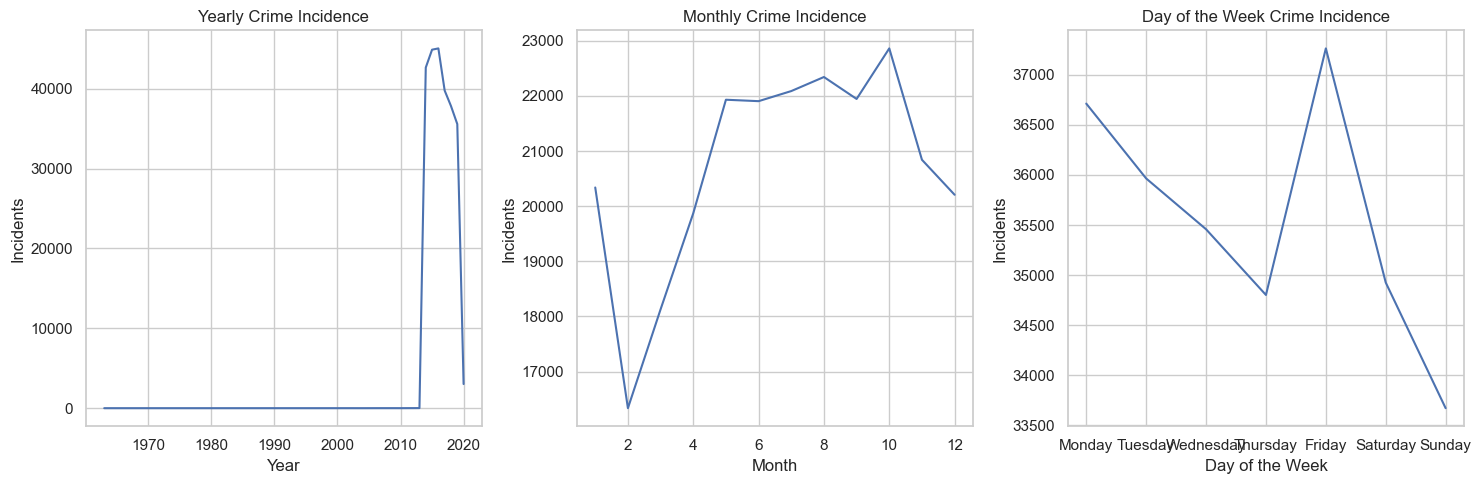

In [230]:
!pip install prettytable
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Read the CSV file
df = pd.read_csv('updated_Baltimore911.csv')

# Convert 'CrimeDate' to datetime type
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract year, month, and day of the week
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.dayofweek

# Aggregating by year
yearly_crime_counts = df.groupby('Year').size()

# Aggregating by month
monthly_crime_counts = df.groupby('Month').size()

# Aggregating by day of the week
day_of_week_crime_counts = df.groupby('DayOfWeek').size()

# Create PrettyTables
year_table = PrettyTable()
year_table.field_names = ["Year", "Incidents"]
for year, count in yearly_crime_counts.iteritems():
    year_table.add_row([year, count])

month_table = PrettyTable()
month_table.field_names = ["Month", "Incidents"]
for month, count in monthly_crime_counts.iteritems():
    month_table.add_row([month, count])

day_table = PrettyTable()
day_table.field_names = ["Day of the Week", "Incidents"]
for day, count in day_of_week_crime_counts.iteritems():
    day_table.add_row([day_names[day], count])

# Print PrettyTables
print("Yearly Crime Incidence")
print(year_table)

print("\nMonthly Crime Incidence")
print(month_table)

print("\nDay of the Week Crime Incidence")
print(day_table)

# Plotting
plt.figure(figsize=(15, 5))

# Year-to-Year
plt.subplot(1, 3, 1)
yearly_crime_counts.plot(kind='line', title='Yearly Crime Incidence')
plt.xlabel('Year')
plt.ylabel('Incidents')

# Monthly
plt.subplot(1, 3, 2)
monthly_crime_counts.plot(kind='line', title='Monthly Crime Incidence')
plt.xlabel('Month')
plt.ylabel('Incidents')

# Day of the Week
day_of_week_crime_counts.index = day_names
plt.subplot(1, 3, 3)
day_of_week_crime_counts.plot(kind='line', title='Day of the Week Crime Incidence')
plt.xlabel('Day of the Week')
plt.ylabel('Incidents')

plt.tight_layout()
plt.show()


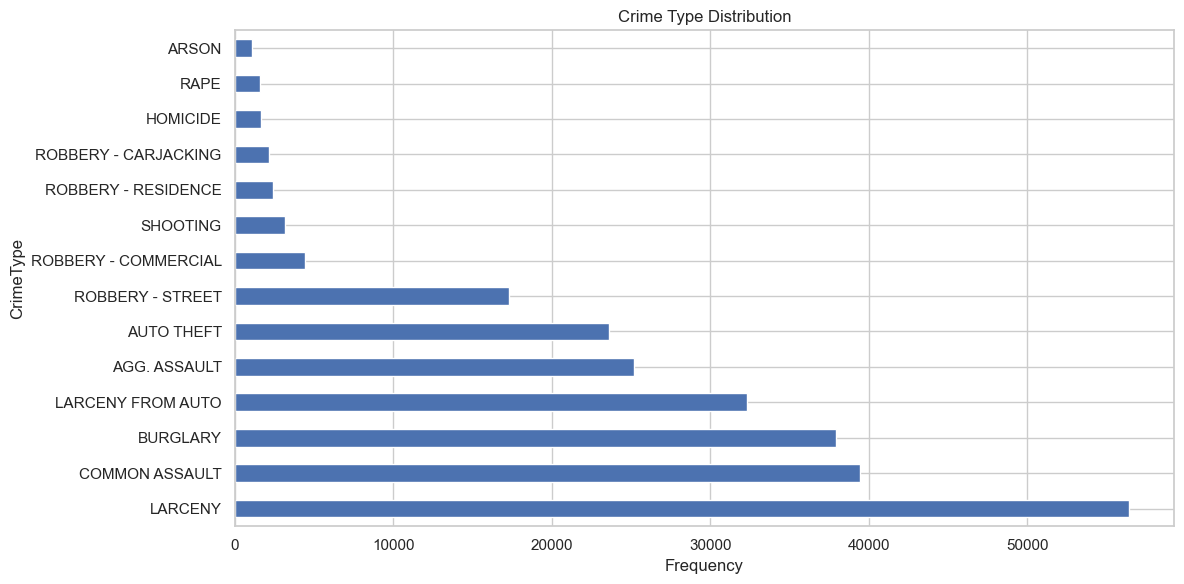

In [187]:
crime_type_counts = df['Description'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
crime_type_counts.plot(kind='barh', title='Crime Type Distribution')  # Changed 'bar' to 'barh'
plt.xlabel('Frequency')  # Switched x-axis label
plt.ylabel('CrimeType')   # Switched y-axis label
plt.tight_layout()
plt.show()


/var/folders/d4/8rhnvj0117zdskwp5zb5ywg40000gn/T/ipykernel_17820/1504998.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('updated_Baltimore911.csv')


<Figure size 3000x1000 with 0 Axes>

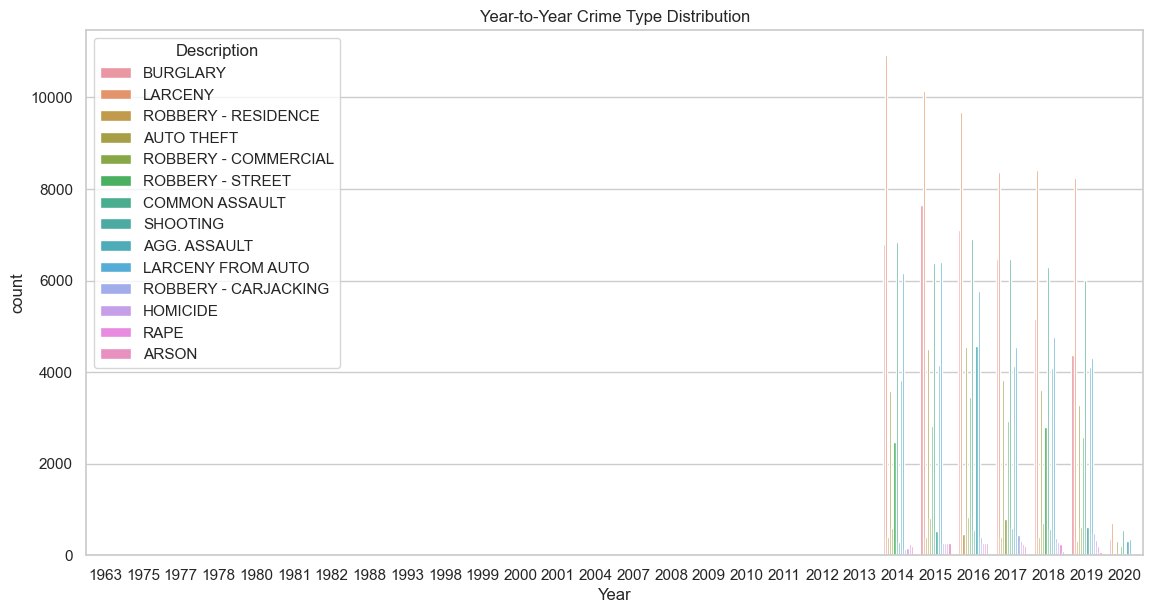

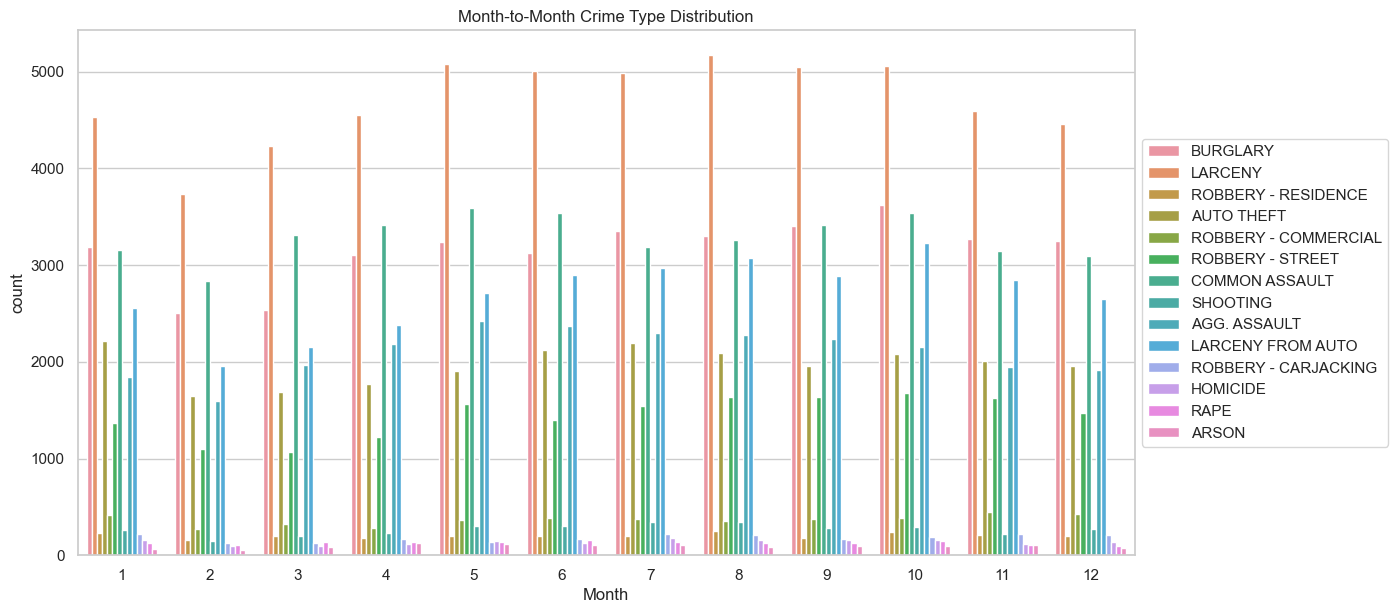

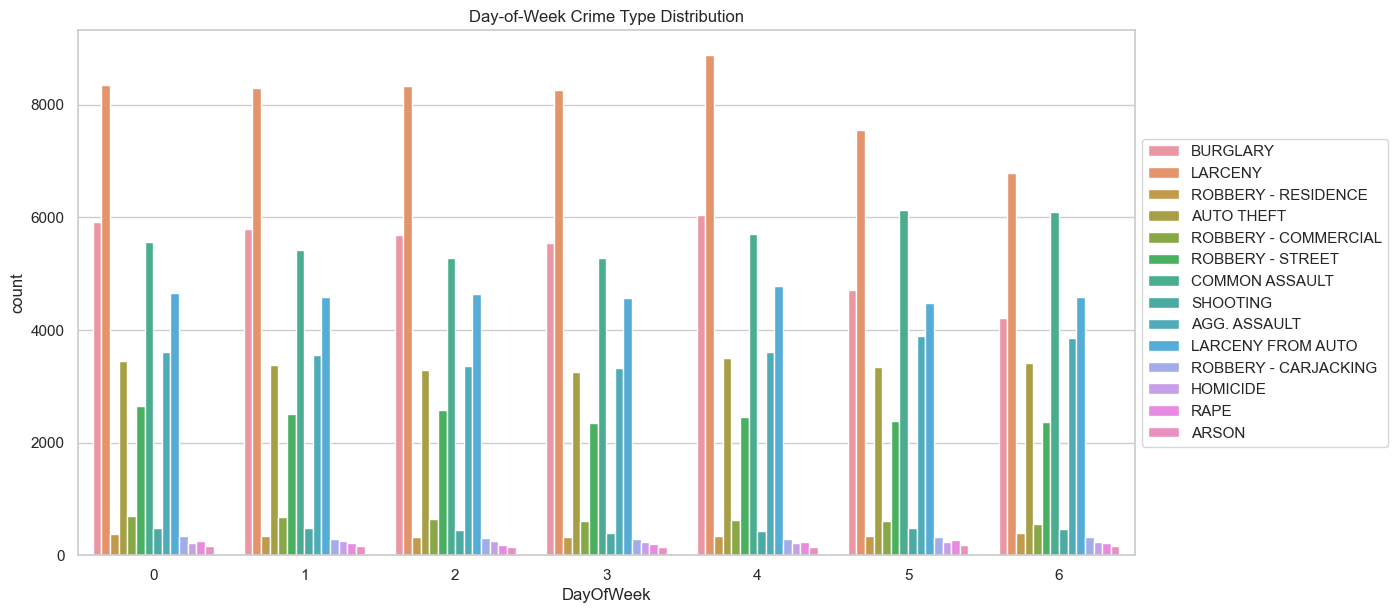

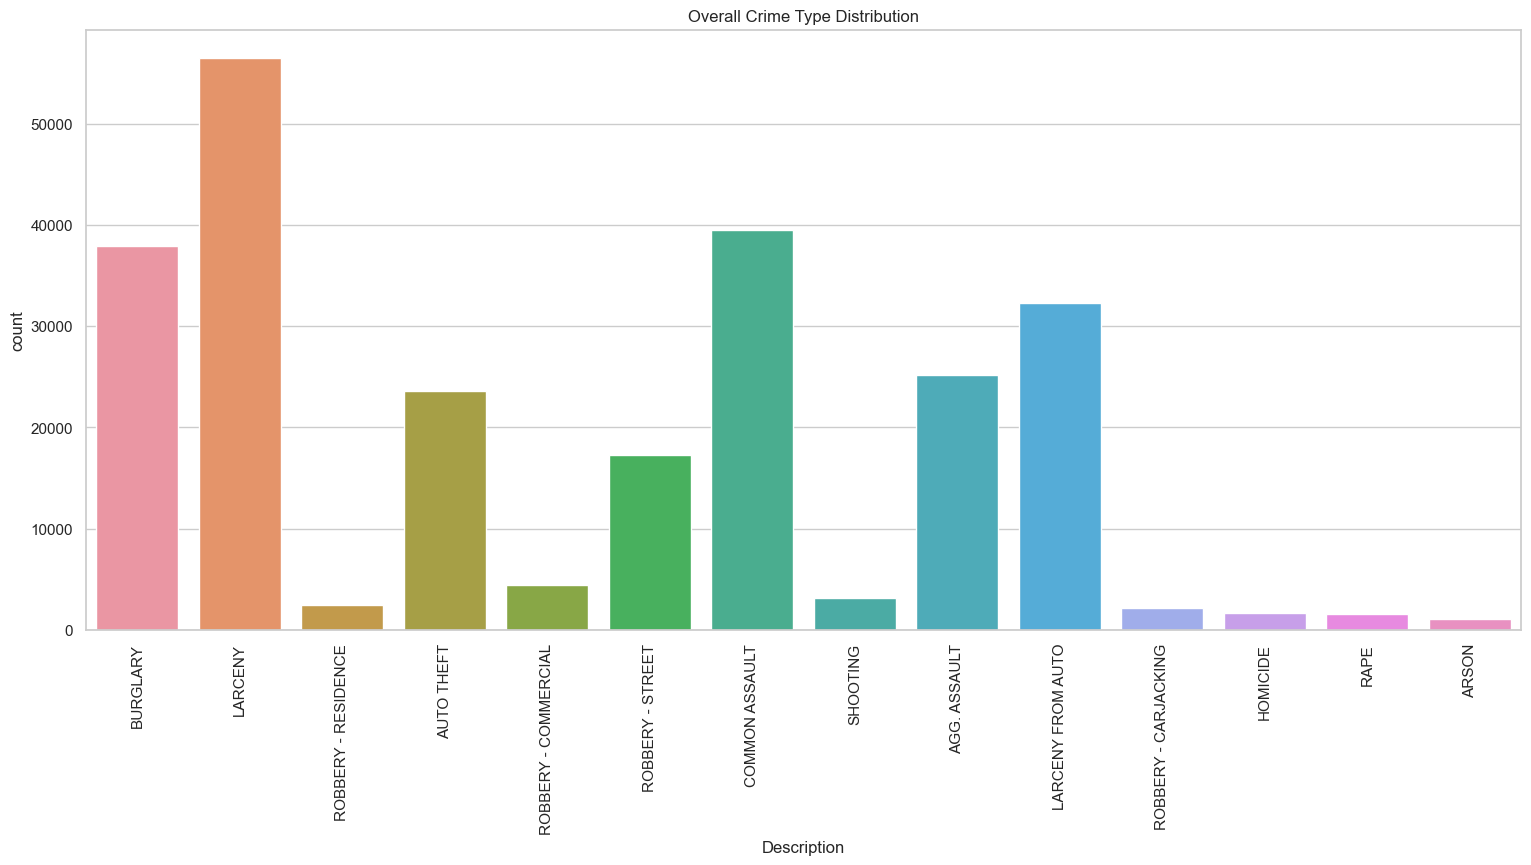

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' has columns: 'Year', 'Month', 'DayOfWeek', 'Crime Type'

df = pd.read_csv('updated_Baltimore911.csv') 

# Set the style of the plots
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(30, 10))

# Year-to-Year Crime Type Distribution
plt.figure(figsize=(30, 15))
plt.subplot(2, 2, 1)
sns.countplot(x='Year', hue='Description', data=df)
plt.title('Year-to-Year Crime Type Distribution')

# Month-to-Month Crime Type Distribution
plt.figure(figsize=(30, 15))
ax = plt.subplot(2, 2, 2)
sns.countplot(x='Month', hue='Description', data=df)
plt.title('Month-to-Month Crime Type Distribution')

# Move the legend to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Day-of-Week Crime Type Distribution
plt.figure(figsize=(30, 15))
ax = plt.subplot(2, 2, 3)
sns.countplot(x='DayOfWeek', hue='Description', data=df)
plt.title('Day-of-Week Crime Type Distribution')

# Move the legend to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Overall Crime Type Distribution
plt.figure(figsize=(30, 15))
  # Adjust the width and height as needed
plt.subplot(2, 2, 4)
sns.countplot(x='Description', data=df)
plt.title('Overall Crime Type Distribution')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [13]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Assuming you have your crime dataset in a DataFrame named 'df'

df = pd.read_csv('updated_Baltimore911.csv')


# Replace missing locations with 'Unknown'
df['Location'].fillna('Unknown', inplace=True)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Crime Exploration Dashboard"),

    # Dropdown for location
    dcc.Dropdown(
        id='location-dropdown',
        options=[{'label': location, 'value': location} for location in df['Location'].unique()] + [{'label': 'All', 'value': 'All'}],
        multi=True,
        value=[],  # Default: no location selected
        placeholder="Select Location(s)"
    ),

    # Dropdown for start year
    dcc.Dropdown(
        id='start-year-dropdown',
        options=[{'label': year, 'value': year} for year in df['Year'].unique()],
        multi=False,
        value=min(df['Year']),  # Default: minimum year
        placeholder="Select Start Year"
    ),

    # Dropdown for end year
    dcc.Dropdown(
        id='end-year-dropdown',
        options=[{'label': year, 'value': year} for year in df['Year'].unique()],
        multi=False,
        value=max(df['Year']),  # Default: maximum year
        placeholder="Select End Year"
    ),

    # Dropdown for month
    dcc.Dropdown(
       id='month-dropdown',
       options=[{'label': month, 'value': month} for month in df['Month'].unique()] + [{'label': 'All', 'value': 'All'}],
       multi=True,
       value=[],  # Default: no month selected
       placeholder="Select Month(s)"
    ),


    # Dropdown for day of the week
    dcc.Dropdown(
        id='day-of-week-dropdown',
        options=[
            {'label': 'Monday', 'value': 0},
            {'label': 'Tuesday', 'value': 1},
            {'label': 'Wednesday', 'value': 2},
            {'label': 'Thursday', 'value': 3},
            {'label': 'Friday', 'value': 4},
            {'label': 'Saturday', 'value': 5},
            {'label': 'Sunday', 'value': 6},
            {'label': 'All', 'value': 'All'}
        ],
        multi=True,
        value=[],  # Default: no day selected
        placeholder="Select Day(s) of the Week"
    ),

    # Dropdown for time
    dcc.Dropdown(
        id='time-dropdown',
        options=[
            {'label': 'Morning (6 AM - 12 PM)', 'value': 'morning'},
            {'label': 'Afternoon (12 PM - 6 PM)', 'value': 'afternoon'},
            {'label': 'Evening (6 PM - 12 AM)', 'value': 'evening'},
            {'label': 'Late Night (12 AM - 6 AM)', 'value': 'latenight'},
            {'label': 'All Times', 'value': 'alltimes'}
        ],
        multi=False,
        value='alltimes',  # Default: All Times
        placeholder="Select Time"
    ),

    # Graph to display crime incidents on a map
    dcc.Graph(id='crime-map'),

    # Temporal distribution plot
    dcc.Graph(id='temporal-plot'),

    # Temporal distribution plot for monthly data
    dcc.Graph(id='temporal-plot-monthly'),

    # Temporal distribution plot for days of the week
    dcc.Graph(id='temporal-plot-days-of-week')
])

# Define callback to update the crime map and temporal plots based on user inputs
@app.callback(
    [Output('crime-map', 'figure'),
     Output('temporal-plot', 'figure'),
     Output('temporal-plot-monthly', 'figure'),
     Output('temporal-plot-days-of-week', 'figure')],
    [Input('location-dropdown', 'value'),
     Input('start-year-dropdown', 'value'),
     Input('end-year-dropdown', 'value'),
     Input('month-dropdown', 'value'),
     Input('day-of-week-dropdown', 'value'),
     Input('time-dropdown', 'value')]  # Add input for time
)
def update_crime_map_and_temporal_plots(selected_locations, start_year, end_year, selected_months, selected_days, selected_time):
    filtered_df = df.copy()

    # Apply filters based on user selections
    if selected_locations and 'All' not in selected_locations:
        filtered_df = filtered_df[filtered_df['Location'].isin(selected_locations)]

    filtered_df = filtered_df[
        (filtered_df['Year'] >= start_year) &
        (filtered_df['Year'] <= end_year)
    ]

    if selected_months and 'All' not in selected_months:
        filtered_df = filtered_df[filtered_df['Month'].isin(selected_months)]

    if selected_days and 'All' not in selected_days:
        filtered_df = filtered_df[filtered_df['DayOfWeek'].isin(selected_days)]

    # Filter by time
    if selected_time == 'morning':
        filtered_df = filtered_df[(filtered_df['CrimeTime'] >= '06:00:00') & (filtered_df['CrimeTime'] < '12:00:00')]
    elif selected_time == 'afternoon':
        filtered_df = filtered_df[(filtered_df['CrimeTime'] >= '12:00:00') & (filtered_df['CrimeTime'] < '18:00:00')]
    elif selected_time == 'evening':
        filtered_df = filtered_df[(filtered_df['CrimeTime'] >= '18:00:00') & (filtered_df['CrimeTime'] < '00:00:00')]
    elif selected_time == 'latenight':
        filtered_df = filtered_df[((filtered_df['CrimeTime'] >= '00:00:00') & (filtered_df['CrimeTime'] < '06:00:00')) | (filtered_df['CrimeTime'] == '24:00:00')]
    
    # Calculate description counts dynamically
    description_counts = filtered_df['Description'].value_counts().reset_index()
    description_counts.columns = ['Description', 'DescriptionCount']

    # Merge the description counts back into the filtered DataFrame
    filtered_df = pd.merge(filtered_df, description_counts, on='Description')

    # Create a new column combining Description and DescriptionCount
    filtered_df['DescriptionWithCount'] = filtered_df['Description'] + ' (' + filtered_df['DescriptionCount'].astype(str) + ')'

    # Create a scatter map using Plotly Express with DescriptionWithCount as color
    fig_map = px.scatter_mapbox(
        filtered_df,
        lat='Latitude',
        lon='Longitude',
        color='DescriptionWithCount',  # Color by description with count
        hover_name='DescriptionWithCount',  # Hover text includes description with count
        zoom=10,
    )

    fig_map.update_layout(
        mapbox_style="carto-positron",
        margin={"r": 0, "t": 0, "l": 0, "b": 0},
    )

    # Create temporal distribution plot using Plotly
    grouped_data = filtered_df.groupby('Year')['Description'].count().reset_index()
    fig_temporal = px.line(
        grouped_data,
        x='Year',
        y='Description',
        labels={'Year': 'Year', 'Description': 'Number of Incidents'},
        title='Temporal Distribution of Crime'
    )

    # Create temporal distribution plot for monthly data using Plotly
    grouped_data_monthly = filtered_df.groupby(['Year', 'Month'])['Description'].count().reset_index()
    fig_temporal_monthly = px.line(
        grouped_data_monthly,
        x='Year',
        y='Description',
        color='Month',
        labels={'Year': 'Year', 'Description': 'Number of Incidents'},
        title='Temporal Distribution of Crime (Monthly)'
    )

    # Create temporal distribution plot for days of the week using Plotly
    grouped_data_days_of_week = filtered_df.groupby('DayOfWeek')['Description'].count().reset_index()
    fig_temporal_days_of_week = px.line(
        grouped_data_days_of_week,
        x='DayOfWeek',
        y='Description',
        labels={'DayOfWeek': 'Day of the Week', 'Description': 'Number of Incidents'},
        title='Temporal Distribution of Crime (Day of the Week)'
    )

    return fig_map, fig_temporal, fig_temporal_monthly, fig_temporal_days_of_week

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

/var/folders/d4/8rhnvj0117zdskwp5zb5ywg40000gn/T/ipykernel_17820/2695460105.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/d4/8rhnvj0117zdskwp5zb5ywg40000gn/T/ipykernel_17820/2695460105.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/var/folders/d4/8rhnvj0117zdskwp5zb5ywg40000gn/T/ipykernel_17820/2695460105.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('updated_Baltimore911.csv')
